# てきとうなCNN実装

In [1]:
import matplotlib.pyplot as plt

from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Input, Dense, Conv2D, MaxPool2D, Flatten, Dropout
from keras.models import Model
from keras.optimizers import SGD
from keras.callbacks import CSVLogger

Using TensorFlow backend.


In [2]:
n_categories = 5
batch_size = 32
is_save_model = False
# 画像サイズ
H = 224
W = 224
C = 3
# ディレクトリ
train_dir = './data/train'
validation_dir = './data/validation'
file_name = './model/cnn'

# データの取得

In [3]:
# 学習データ
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    shear_range=0.2,  # これ以降は多分水増し関係の設定
    zoom_range=0.2,
    horizontal_flip=True  # 画像を取得するときにランダムに反転する
)
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(H, W),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True
)

# 検証データ
validation_datagen = ImageDataGenerator(rescale=1.0/255)
validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(H, W),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True
)

Found 250 images belonging to 5 classes.
Found 150 images belonging to 5 classes.


(32, 224, 224, 3) 0.0 1.0


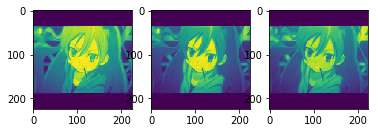

In [4]:
# 訓練画像表示
index = 0
img = train_generator.__getitem__(0)[0]
print(img.shape, img.min(), img.max())
img_index = img[index]

for i in range(3):
    plt.subplot(1, 3, i+1)
    plt.imshow(img_index[:, :, i])

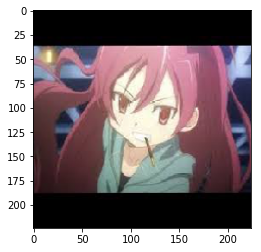

In [5]:
plt.imshow(img_index)

# モデル作成

In [6]:
# functional API
inputs = Input(shape=(H, W, C))
x = Conv2D(16, 3, activation='relu')(inputs)
x = Conv2D(32, 3, activation='relu')(x)
x = MaxPool2D(pool_size=(2, 2))(x)
x = Conv2D(64, 3, activation='relu')(x)
x = MaxPool2D(pool_size=(2, 2))(x)

x = Flatten()(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(1.0)(x)  # ドロップアウトする割合

predictions = Dense(n_categories, activation='softmax')(x)

W0329 16:46:55.810891  2864 deprecation_wrapper.py:119] From C:\Users\tak-o\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4070: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.



In [7]:
model = Model(inputs=inputs, outputs=predictions)

In [8]:
model.compile(optimizer=SGD(lr=0.0001, momentum=0.9),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [9]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 222, 222, 16)      448       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 220, 220, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 110, 110, 32)      0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 108, 108, 64)      18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 186624)            0   

# 学習

In [10]:
# ログの保存ファイル
if is_save_model:
    callbacks = [CSVLogger(file_name+'.csv')]
else:
    callbacks = None

In [ ]:
# 学習
hist = model.fit_generator(train_generator,
                           epochs=200,
                           verbose=1,
                           validation_data=validation_generator,
                           callbacks=callbacks)

W0329 16:47:05.267075  2864 deprecation_wrapper.py:119] From C:\Users\tak-o\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:422: The name tf.global_variables is deprecated. Please use tf.compat.v1.global_variables instead.



Epoch 1/200
8/8 [==============================] - 6s 707ms/step - loss: 1.6168 - accuracy: 0.1920 - val_loss: 1.6224 - val_accuracy: 0.2000
Epoch 2/200
8/8 [==============================] - 1s 170ms/step - loss: 1.6062 - accuracy: 0.2000 - val_loss: 1.5601 - val_accuracy: 0.2200
Epoch 3/200
8/8 [==============================] - 2s 297ms/step - loss: 1.5981 - accuracy: 0.2120 - val_loss: 1.5747 - val_accuracy: 0.2067
Epoch 4/200
8/8 [==============================] - 2s 286ms/step - loss: 1.5918 - accuracy: 0.2040 - val_loss: 1.5907 - val_accuracy: 0.2267
Epoch 5/200
8/8 [==============================] - 2s 296ms/step - loss: 1.5837 - accuracy: 0.2520 - val_loss: 1.6159 - val_accuracy: 0.3000
Epoch 6/200
8/8 [==============================] - 2s 286ms/step - loss: 1.5760 - accuracy: 0.3040 - val_loss: 1.6140 - val_accuracy: 0.3133
Epoch 7/200
8/8 [==============================] - 2s 299ms/step - loss: 1.5697 - accuracy: 0.3040 - val_loss: 1.5913 - val_accuracy: 0.3200
Epoch 8/200
8

In [ ]:
# 「モデル構造、モデルの重み、学習時の設定、optimizerの状態」を保存
if is_save_model:
    model.save(file_name + '.h5')

# 結果

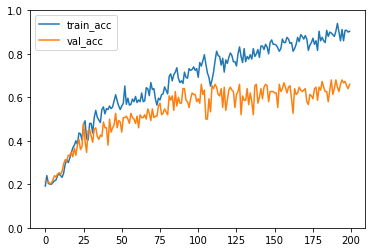

In [29]:
# 精度の変化
plt.plot(hist.history['accuracy'], label='train_acc')
plt.plot(hist.history['val_accuracy'], label='val_acc')
plt.ylim(0, 1)
plt.legend()